In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('bitcoin_tweets_2021_prices_final (1).csv')
df.head()

,Unnamed: 0,date,text,user_followers,user_favourites,Compound,Open,Close,Volume
0,0,2021-04-07,"when supply is more than demand, what happens?...",147300.0,16909.0,0.5302,58186.507813,56048.937500,75645303584
1,1,2021-04-06,time to step up your crypto game with gk! chec...,142460.0,68708.0,0.0000,59171.933594,58192.359375,66058027988
2,2,2021-04-06,we believe that businesses built on bitcoin s...,139926.0,13256.0,0.6249,59171.933594,58192.359375,66058027988
3,3,2021-04-05,jpmorgan has revised its bitcoin price target...,978164.0,10105.0,0.0000,58760.875000,59057.878906,60706272115
4,4,2021-04-05,"host of , joins for a look at everything fro...",224316.0,13691.0,0.0000,58760.875000,59057.878906,60706272115


In [ ]:
df.describe()

,Unnamed: 0,user_followers,user_favourites,Compound,Open,Close,Volume
count,4250.000000,4.250000e+03,4250.000000,4250.000000,4250.000000,4250.000000,4.250000e+03
mean,2124.500000,6.802532e+05,38876.476471,0.180620,45029.241928,45121.140024,3.283462e+10
std,1227.013651,8.952550e+05,51473.647659,0.385601,10418.110293,10438.542578,8.667880e+09
min,0.000000,7.758100e+04,6174.000000,-0.924000,29796.285156,29807.347656,1.683315e+10
25%,1062.250000,1.610250e+05,11356.000000,0.000000,36471.589844,35287.781250,2.492431e+10
50%,2124.500000,4.081390e+05,18484.000000,0.000000,43791.925781,43949.101563,3.345136e+10
75%,3186.750000,1.012058e+06,55536.750000,0.476700,49562.347656,49339.175781,3.873408e+10
max,4249.000000,1.747709e+07,766056.000000,0.980600,66002.234375,65992.835938,9.746887e+10


In [ ]:
df.isnull().sum()

Unnamed: 0         0
date               0
text               0
user_followers     0
user_favourites    0
Compound           0
Open               0
Close              0
Volume             0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       4250 non-null   int64  
 1   date             4250 non-null   object 
 2   text             4250 non-null   object 
 3   user_followers   4250 non-null   float64
 4   user_favourites  4250 non-null   float64
 5   Compound         4250 non-null   float64
 6   Open             4250 non-null   float64
 7   Close            4250 non-null   float64
 8   Volume           4250 non-null   int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 299.0+ KB


In [ ]:
df.corr()

,Unnamed: 0,user_followers,user_favourites,Compound,Open,Close,Volume
Unnamed: 0,1.000000,0.014854,-0.029204,-0.055197,0.337955,0.321645,-0.048749
user_followers,0.014854,1.000000,-0.175290,0.000968,0.042988,0.042749,0.003844
user_favourites,-0.029204,-0.175290,1.000000,-0.027530,-0.038404,-0.036646,-0.028281
Compound,-0.055197,0.000968,-0.027530,1.000000,0.008387,0.013924,-0.045671
Open,0.337955,0.042988,-0.038404,0.008387,1.000000,0.985302,0.413282
Close,0.321645,0.042749,-0.036646,0.013924,0.985302,1.000000,0.377683
Volume,-0.048749,0.003844,-0.028281,-0.045671,0.413282,0.377683,1.000000


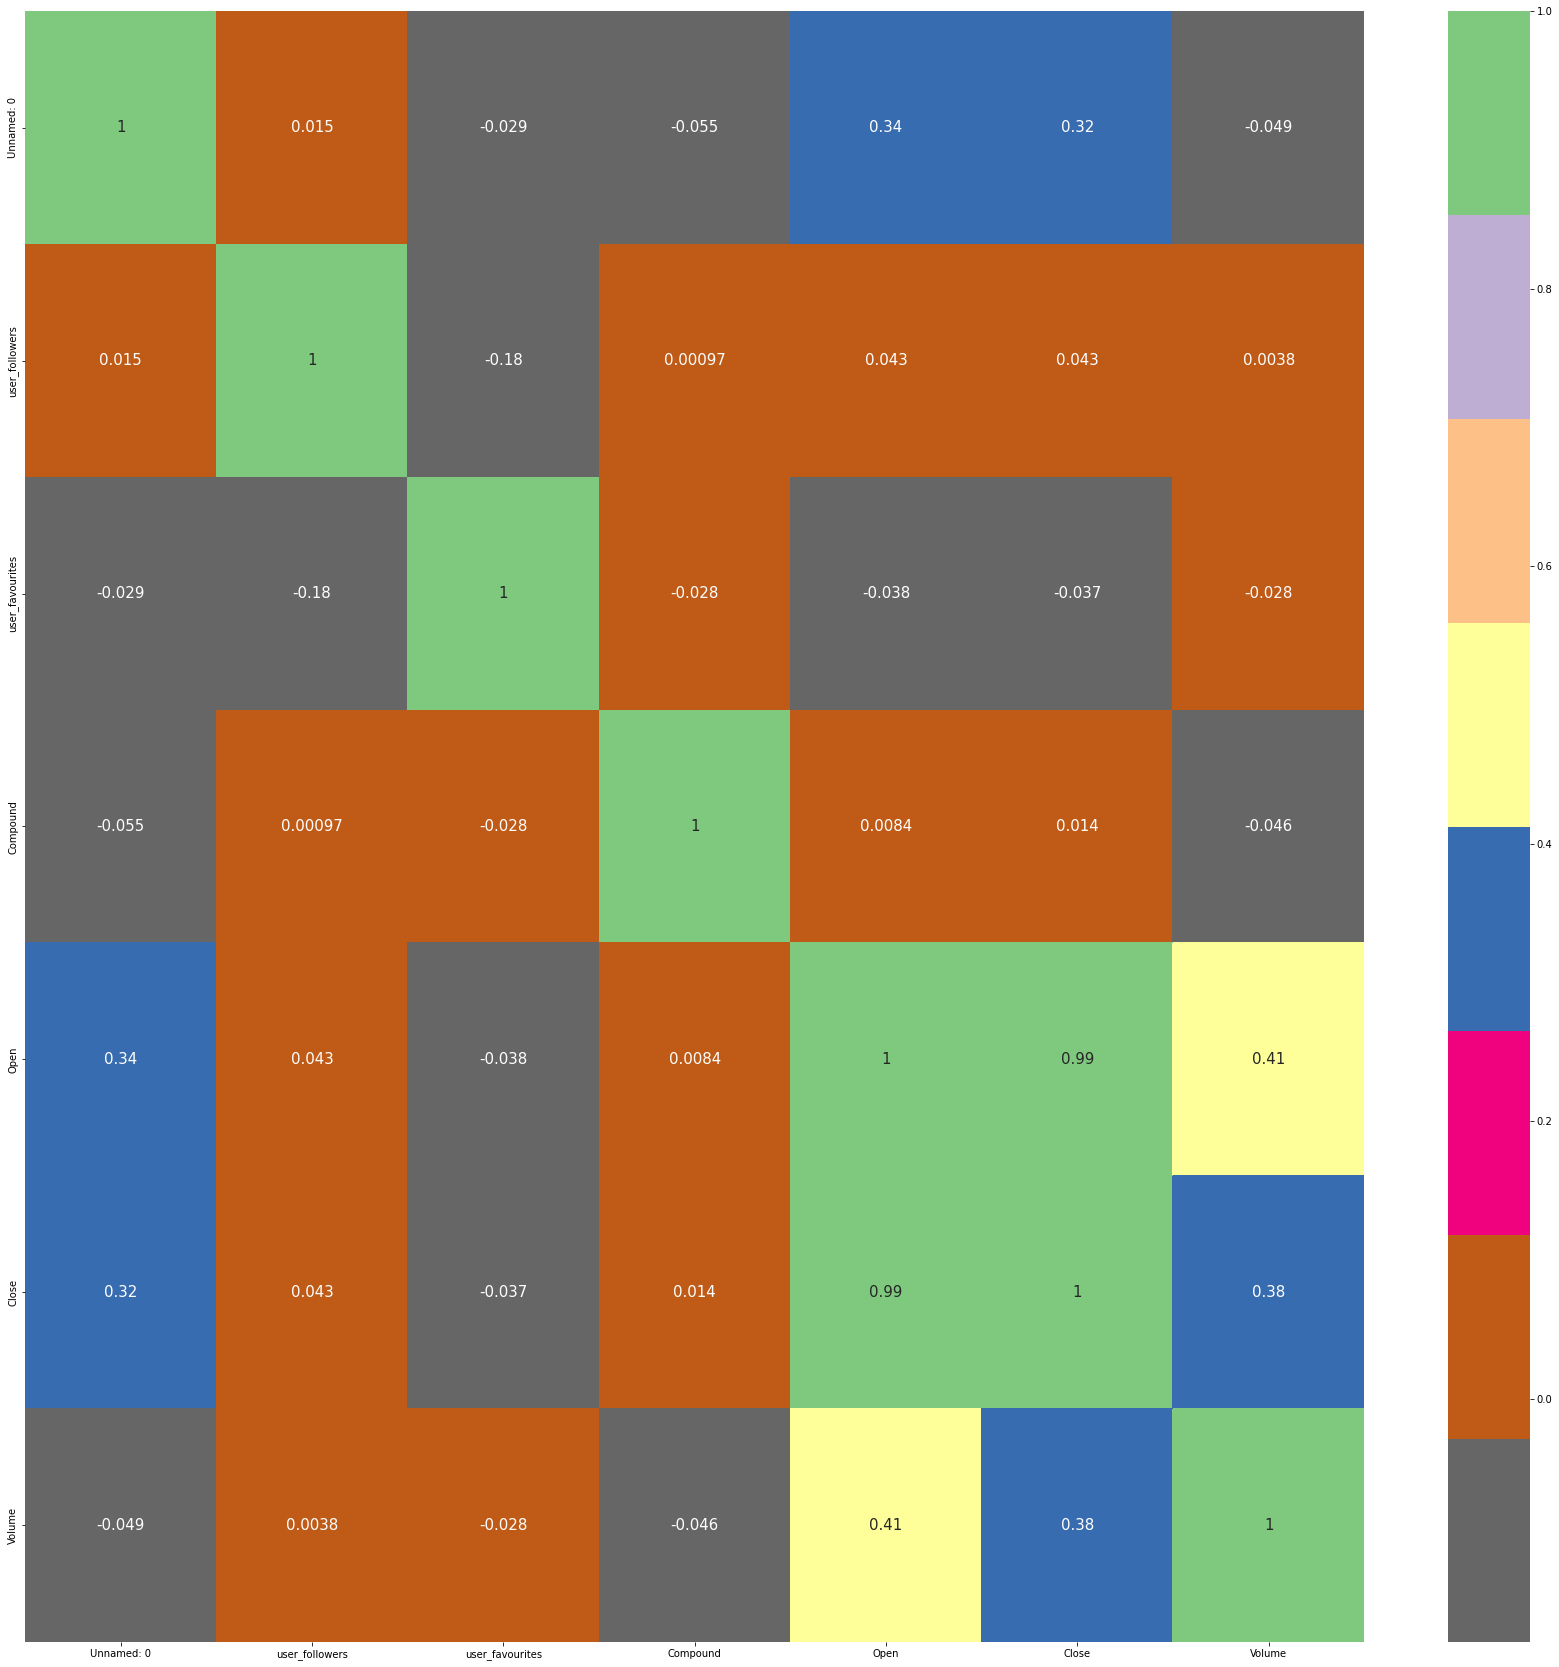

In [ ]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(), annot=True , cmap=plt.cm.Accent_r,annot_kws={'fontsize':15})
plt.show()


In [ ]:
def correlation(data, threshold):
  corr = data.corr()['Close'].sort_values(ascending=False)[1:]
  abs_corr = abs(corr)
  relevent_features = abs_corr[abs_corr>threshold]
  return relevent_features

In [ ]:
corr_features = correlation(df,0.81)

In [ ]:
corr_features

Open    0.985302
Name: Close, dtype: float64

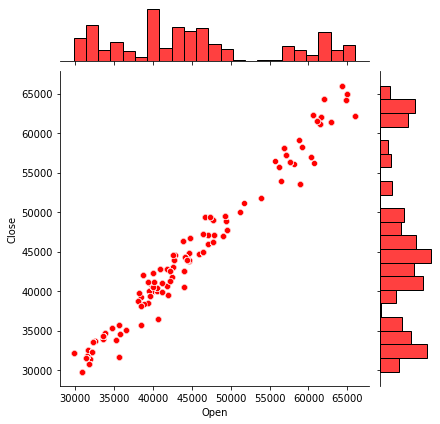

In [ ]:
sns.jointplot(df['Open'] , df['Close'] , color='red')

In [ ]:
df1 = df[corr_features.index]


In [ ]:
df1

,Open
0,58186.507813
1,59171.933594
2,59171.933594
3,58760.875000
4,58760.875000
...,...
4245,40123.570313
4246,40123.570313
4247,40123.570313
4248,40123.570313


In [ ]:
X = df1
y = df['Close']


In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2 , random_state=51)

In [ ]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((3400, 1), (850, 1), (3400,), (850,))

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [ ]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
 lr = LinearRegression()

In [ ]:
lr.fit(X_train , y_train)

LinearRegression()

In [ ]:
pred = lr.predict(X_test)

In [ ]:
pred[0]

36674.32336975466

In [ ]:
y_test.iloc[0]

35030.25

In [ ]:
from sklearn.metrics import mean_absolute_error , mean_squared_error
import math

In [ ]:
print(f'Mean Absolute Error = {mean_absolute_error(y_test,pred)}')



Mean Absolute Error = 1375.2581805400414
